# Lineární hyperbolický systém PDR 1. řádu

**Definice:**
Systém PDR ve tvaru $U_t + A U_x = 0$, kde $U: \mathbb R\times\mathbb R_+ \to \mathbb R^l$ a $A \in \mathbb R^{l,l}$ nazveme *hyperbolickým* právě tehdy, když matice $A$ má $l$ reálných vlastních čísel a $l$ lineárně nezávislých vlastních vektorů.



## Charakteristické proměnné

Splňuje-li $A$ výše uvedené podmínky, je možné ji rozložit na součin
$$
    A = R \Lambda R^{-1},
$$
kde $\Lambda=diag(\lambda_1, \lambda_2, ..., \lambda_l)$ je diagonální matice a $R$ obsahuje ve sloupcích příslušné vlastní vektory, tj. $R=[\vec{r}_1, \vec{r}_2, ..., \vec{r}_l]$. 

Systém pak lze přepsat jako
$$
U_t + R \Lambda R^{-1} U_x = 0
$$
a po vynásobení maticí $R^{-1}$ zleva dostáváme
$$
R^{-1} U_t + R^{-1} R \Lambda R^{-1} U_x = (R^{-1} U)_t + E \Lambda (R^{-1} U)_x = 0.
$$

Označíme-li $V = R^{-1} U$, je původní systém ekvivalentní systému $l$ nezávislých rovnic 
$$
    V_t + \Lambda V_x = 0
$$
což je po složkách
$$
    \frac{\partial v_k}{\partial t} + \lambda_k \frac{\partial v_k}{\partial x} = 0.
$$

**Definice:** Mějme hyperbolický systém $U_t + A U_x = 0$. Proměnné $V = R^{-1} U$, kde $R$ je matice složená z vlastních vektorů matice $A$, nazveme *cahrakteristickými proměnnými*.

## Počáteční úloha pro lineární hyperbolický systém

**Definice:** Je dán hyperbolický systém $U_t + A U_x=0$ a vektorová funkce $U_0 \in C^1(\mathbb R \to \mathbb R^l)$ (počáteční podmínka). Počáteční úlohou pro tento systém s danou počáteční podmínkou budeme rozumět nalezení takové funkce $U \in C^1( \mathbb R\times\mathbb R_+ \to \mathbb R^l)$, že $\forall x \in \mathbb R$ a $\forall t > 0$ funkce $U$ vyhovuje danému systému a pro $t=0$ je $U(x,0)=u_0(x)$.

*Poznámka:* pro případ nespojité počáteční podmínky je třeba přejít ke slabému řešení.

Pro skalární problém  $v_t + \lambda v_x=0$ umíme pomocí metody charakteristik určit řešení jako $v(x,t) = v_0(x - \lambda t)$. Proto lze (v charakteristických proměnných) zapsat řešení počáteční úlohy jako
$$
    v_k(x,t) = v_k^0(x-\lambda_k t),
$$
kde $v_k^0$ je $k$-tá zložka vektoru $V^ = R^{-1} U_0$ a v původních $U$ je to tedy
$$
    U(x,t) = \sum_{k=1}^l \vec{r}_k v_k(x,t) = \sum_{k=1}^l \vec{r}_k v_k^0(x - \lambda_k t).
$$


## Příklad: linearizovaný systém Eulerových rovnic v 1D

Nelineární systém Eulerových rovnic v 1D lze zapsat jako
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 (\rho u)_t + (\rho u^2 + p)_x &= 0, \\
 (\rho E)_t + [(\rho E + p) u]_x &= 0,
\end{align*}
kde $\rho$ je hustota, $u$ je rychlost, $p$ je tlak a $E$ je celková energie vztažená na kg. Pro ideální plyn je ze stavové rovnice
$
    p = (\gamma-1)(\rho E - \frac{1}{2} \rho u^2).
$

Předpokládáme-li, že všechny valičiny mají spojité derivace, lze systém převést na tvar
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 u_t + u u_x + \frac{1}{\rho} p_x &= 0, \\
 p_t + u p_x + \gamma p u_x &= 0.
\end{align*}

Systém linearizujeme ($\rho(x,t) = \bar{\rho} + \rho'(x,t)$, podobně pro $u$ a $p$) a dostáváme
\begin{align*}
 \rho_t + \bar{u} \rho_x + \bar{\rho} u_x &= 0, \\
 u_t + \bar{u} u_x + \frac{1}{\bar\rho} p_x &= 0, \\
 p_t + \gamma \bar{p} u_x + \bar{u} p_x &= 0.
\end{align*}

Označme $U=[\rho, u, p]$. Potom dostáváme systém $U_t + A U_x = 0$ s maticí
$$
A = \begin{pmatrix}
\bar{u} & \bar{\rho} & 0 \\
0 & \bar{u} & 1/\bar{\rho} \\
0 & \gamma \bar{p} & \bar{u}
\end{pmatrix}.
$$


In [1]:
from sympy import *
init_printing(use_unicode=True)

In [2]:
rhoBar, pBar, aBar, gamma = symbols('rhoBar pBar aBar gamma', positive=True)
uBar = symbols('uBar')

In [3]:
A = Matrix([[uBar, rhoBar, 0],[0,uBar,1/rhoBar], [0, gamma*pBar, uBar]])

In [4]:
A.eigenvals()

{(sqrt(gamma)*sqrt(pBar) + sqrt(rhoBar)*uBar)/sqrt(rhoBar): 1,
 uBar: 1,
 -(sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar): 1}

In [5]:
A.eigenvects()

[(uBar, 1, [Matrix([
   [1],
   [0],
   [0]])]),
 (-(sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar), 1, [Matrix([
   [                     rhoBar/(gamma*pBar)],
   [-1/(sqrt(gamma)*sqrt(pBar)*sqrt(rhoBar))],
   [                                       1]])]),
 ((sqrt(gamma)*sqrt(pBar) + sqrt(rhoBar)*uBar)/sqrt(rhoBar), 1, [Matrix([
   [                    rhoBar/(gamma*pBar)],
   [1/(sqrt(gamma)*sqrt(pBar)*sqrt(rhoBar))],
   [                                      1]])])]

In [6]:
eigen=A.eigenvects();
lambda_1 = eigen[0][0]
lambda_2 = simplify(eigen[1][0].subs(gamma,rhoBar*aBar**2/pBar))
lambda_3 = simplify(eigen[2][0].subs(gamma,rhoBar*aBar**2/pBar))

In [7]:
lambda_1, lambda_2, lambda_3

(uBar, -aBar + uBar, aBar + uBar)

In [8]:
r_1 = eigen[0][2][0]
r_2 = eigen[1][2][0].subs(gamma,rhoBar*aBar**2/pBar)
r_3 = eigen[2][2][0].subs(gamma,rhoBar*aBar**2/pBar)

f = Rational(1,2)
R = Matrix([r_1.T, f*r_2.T, f*r_3.T]).T
R

Matrix([
[1,      1/(2*aBar**2),     1/(2*aBar**2)],
[0, -1/(2*aBar*rhoBar), 1/(2*aBar*rhoBar)],
[0,                1/2,               1/2]])

In [9]:
R1 = R.inv()
R1

Matrix([
[1,            0, -1/aBar**2],
[0, -aBar*rhoBar,          1],
[0,  aBar*rhoBar,          1]])

In [10]:
rho, u, p = symbols('rho u p')

In [11]:
U=Matrix([rho, u, p])
U

Matrix([
[rho],
[  u],
[  p]])

In [12]:
V = R1 * U
V

Matrix([
[   rho - p/aBar**2],
[-aBar*rhoBar*u + p],
[ aBar*rhoBar*u + p]])

#### Šíření poruchy pro případ linearizovaných Eulerových rovnic

* analytické rešení

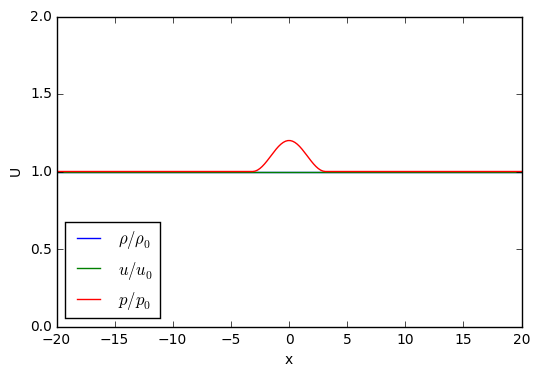

In [13]:
import math
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# Hodnoty velicin v nerozrusenem proudu
rho0   = 1.2
a0     = 340.0
u0     = 100.0
gamma0 = 1.4
p0  = rho0 * a0**2 / gamma0

def U0(x):
    U = array([rho0, u0, p0])
    if abs(x) < math.pi:
        U[2] += (math.cos(x)+1) * 0.1*p0
    return U

x=linspace(-20,20,200)
plt.plot(x, [U0(xi)[0]/rho0  for xi in x], label=r"$\rho/\rho_0$")
plt.plot(x, [U0(xi)[1]/u0 for xi in x], label=r"$u/u_0$")
plt.plot(x, [U0(xi)[2]/p0 for xi in x], label=r"$p/p_0$")
plt.ylim(0,2); plt.xlabel("x");
plt.ylabel("U")
plt.legend(loc="lower left");

In [14]:
R0=matrix([[1,0,0],[0.5/a0**2,-0.5/a0/rho0, 0.5],[0.5/a0**2,0.5/a0/rho0, 0.5]]).T

In [15]:
R01=linalg.inv(R0)
l0 = [u0, u0-a0, u0+a0]

In [16]:
def V0(x):
    return dot(R01, U0(x))

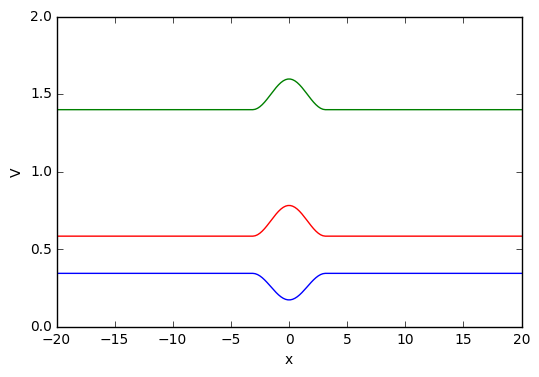

In [17]:
plt.plot(x, [V0(xi)[0,0]  for xi in x], "-b")
plt.plot(x, [V0(xi)[0,1]/1e5  for xi in x], "-r")
plt.plot(x, [V0(xi)[0,2]/1e5  for xi in x], "-g")
plt.ylim(0,2)
plt.xlabel("x");
plt.ylabel("V");

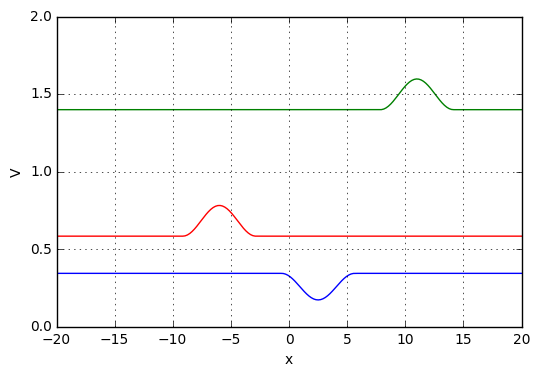

In [70]:
def V(x,t):
    return array([V0(x-l0[0]*t)[0,0], V0(x-l0[1]*t)[0,1], V0(x-l0[2]*t)[0,2]])

t=0.025

plt.plot(x, [V(xi,t)[0]  for xi in x], "-b")
plt.plot(x, [V(xi,t)[1]/1e5  for xi in x], "-r")
plt.plot(x, [V(xi,t)[2]/1e5  for xi in x], "-g")
plt.ylim(0,2)
plt.grid(True)
plt.xlabel("x");
plt.ylabel("V");

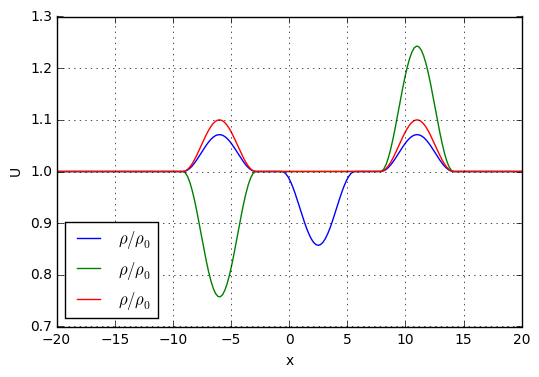

In [83]:
def U(x,t):
    return dot(R0, V(x,t))

plt.plot(x, [U(xi,t)[0,0]/rho0  for xi in x], label=r"$\rho/\rho_0$")
plt.plot(x, [U(xi,t)[0,1]/u0  for xi in x], label=r"$u/_0$")
plt.plot(x, [U(xi,t)[0,2]/p0  for xi in x], label=r"$\rho/\rho_0$")
plt.xlabel("x");
plt.ylabel("U");
plt.grid(True)
plt.legend(loc="lower left");

## Numerické řešení

### Schéma upwind

$$
    F_{i+1/2} = F(U_i,U_{i+1}) = \frac{1}{2}( A U_i + A U_{i+1} ) - \frac{1}{2}|A|(U_{i+1}-u_i)
$$

In [25]:
A0 = matrix([[u0,rho0,0],[0,u0,1/rho0],[0, gamma0*p0, u0]])
A0

matrix([[  1.00000000e+02,   1.20000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+02,   8.33333333e-01],
        [  0.00000000e+00,   1.38720000e+05,   1.00000000e+02]])

In [28]:
Lambda0 = R01 * A0 * R0
Lambda0

matrix([[  1.00000000e+02,   2.71050543e-19,  -2.71050543e-19],
        [  0.00000000e+00,  -2.40000000e+02,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   4.40000000e+02]])

In [32]:
absA0 = R0 * abs(Lambda0) * R01
absA0

matrix([[  1.00000000e+02,   3.52941176e-01,   2.07612457e-03],
        [  0.00000000e+00,   3.40000000e+02,   2.45098039e-01],
        [  0.00000000e+00,   4.08000000e+04,   3.40000000e+02]])

In [55]:
def F_upwind(Ul,Ur):
    F = 0.5 * dot( A0, (Ul+Ur) ) - 0.5 * dot( absA0, (Ur - Ul) )
    return F

In [56]:
dx = x[1] - x[0];
rhoA0 = abs(u0) + a0
dt = 0.8 * dx / rhoA0
dt

0.00036546368204659662

In [78]:
time = 0
tEnd = 0.025

Uold = array([U0(xi) for xi in x])
Unew = copy(Uold)

while time < tEnd:
    for i in range(1,len(Unew)-1):
        Unew[i] = Uold[i] - dt/dx * ( F_upwind(Uold[i],Uold[i+1]) - F_upwind(Uold[i-1],Uold[i]) )

    for i in range(1,len(Unew)-1):
        Uold[i] = Unew[i] 

    time += dt

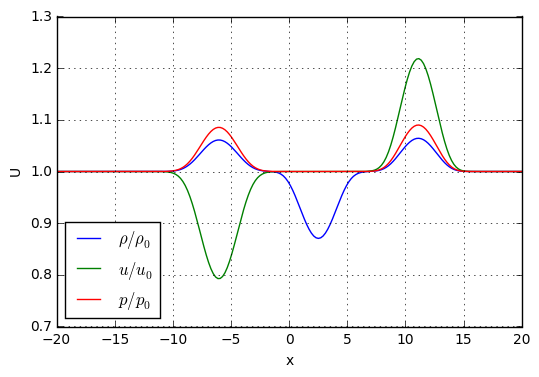

In [79]:
plt.plot(x, [UU[0]/rho0 for UU in Uold], label=r"$\rho/\rho_0$")
plt.plot(x, [UU[1]/u0 for UU in Uold], label=r"$u/u_0$")
plt.plot(x, [UU[2]/p0 for UU in Uold], label=r"$p/p_0$")
plt.xlabel("x");
plt.ylabel("U");
plt.grid(True)
plt.legend(loc="lower left");